#IMPORTING THE LIBRARIES

In [51]:
import pandas as pd
import numpy as np
#IMPORTING FOR DATA VISUALIZATION
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
#IMPORTING FOR TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
#IMPORTING FOR LINEAR REGRESSION
from sklearn.linear_model import LinearRegression

# IMPORTING FOR POLYNOMIAL REGRESSION
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# IMPORTING TO CREATE A PIPELINE
from sklearn.pipeline import Pipeline
# IMPORTING FOR RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
#IMPORTING FOR EVALUATION METRICS
from sklearn import metrics

#READING THE DATASET

In [52]:
df=pd.read_csv('/content/DataCleaned.csv')
df

,Id,Paintings_Name,Year,Painting_type,Auction_date,Percent_Change,Painting size_length,Painting size_breadth,Estimated_price_from_inDollars,Estimated_price_to_inDollars,Sale_price_In_Dollars,Artist,Artist_Nationality,Auction_name,Painting_Links
0,1,Study for Standing Blue Nude,NaN,oil on canvas,15/10/2022,26.0,39.0,47.0,72600.0,96800.0,98572.0,Tom Wesselmann,American,Sotheby's,https://d7hftxdivxxvm.cloudfront.net?resize_to...
1,2,Great American Nude Cut-Out,1970.0,thinned liquitex and graphite on die-cut museu...,01/07/2022,5.0,44.5,33.5,6050.0,8470.0,7661.0,Tom Wesselmann,American,Christie's,https://d7hftxdivxxvm.cloudfront.net?resize_to...
2,3,Still Life with Blue Jar and Smoking Cigarette...,NaN,oil on canvas,30/06/2022,NaN,145.0,275.6,0.0,0.0,1033885.0,Tom Wesselmann,American,Bonhams,https://d7hftxdivxxvm.cloudfront.net?resize_to...
3,4,Smoker #21,1975.0,oil on shaped canvas,28/06/2022,2.0,171.5,185.4,2420000.0,3630000.0,2995455.0,Tom Wesselmann,American,Christie's,https://d7hftxdivxxvm.cloudfront.net?resize_to...
4,5,Great American Nude #9,1961.0,"oil, fabric and printed paper collage on board",20/05/2022,2.0,121.9,121.9,900000.0,1200000.0,1071000.0,Tom Wesselmann,American,Sotheby's,https://d7hftxdivxxvm.cloudfront.net?resize_to...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,690,Kurage-bo,2004.0,acrylic on canvas mounted on panel,14/11/2018,0.0,80.0,80.0,120000.0,180000.0,150000.0,Takashi Murakami,Japanese,Phillips,https://d7hftxdivxxvm.cloudfront.net?resize_to...
690,691,AND THEN,NaN,"acrylic on canvas on board, in two parts",14/11/2018,38.0,280.0,300.0,1500000.0,2000000.0,2415000.0,Takashi Murakami,Japanese,Sotheby's,NaN
691,692,Dazzling Circus: Embrace Peace and Darkness wi...,2013.0,Acrylic on canvas,27/10/2018,44.0,153.0,199.0,576000.0,864000.0,1284664.0,Takashi Murakami,Japanese,SBI Art Auction,https://d7hftxdivxxvm.cloudfront.net?resize_to...
692,693,With Eyes on the Reality of One Hundred Years ...,2013.0,acrylic on canvas,05/10/2018,24.0,100.5,100.0,484000.0,726000.0,499757.0,Takashi Murakami,Japanese,Phillips,https://d7hftxdivxxvm.cloudfront.net?resize_to...


#DATA PRE-PROCESSING

**REMOVING THE ROWS WITH NO YEAR**

In [53]:
df = df[df['Year'].notna()]
df.head(5)

,Id,Paintings_Name,Year,Painting_type,Auction_date,Percent_Change,Painting size_length,Painting size_breadth,Estimated_price_from_inDollars,Estimated_price_to_inDollars,Sale_price_In_Dollars,Artist,Artist_Nationality,Auction_name,Painting_Links
1,2,Great American Nude Cut-Out,1970.0,thinned liquitex and graphite on die-cut museu...,01/07/2022,5.0,44.5,33.5,6050.0,8470.0,7661.0,Tom Wesselmann,American,Christie's,https://d7hftxdivxxvm.cloudfront.net?resize_to...
3,4,Smoker #21,1975.0,oil on shaped canvas,28/06/2022,2.0,171.5,185.4,2420000.0,3630000.0,2995455.0,Tom Wesselmann,American,Christie's,https://d7hftxdivxxvm.cloudfront.net?resize_to...
4,5,Great American Nude #9,1961.0,"oil, fabric and printed paper collage on board",20/05/2022,2.0,121.9,121.9,900000.0,1200000.0,1071000.0,Tom Wesselmann,American,Sotheby's,https://d7hftxdivxxvm.cloudfront.net?resize_to...
5,6,Final Study for Kate Nude,1977.0,oil on canvas,19/05/2022,36.0,37.5,47.6,70000.0,100000.0,115920.0,Tom Wesselmann,American,Phillips,https://d7hftxdivxxvm.cloudfront.net?resize_to...
6,7,Smoker from An American Portrait,1776.0,Screenprint in colors on Museum board,12/05/2022,2.0,41.9,41.8,10000.0,15000.0,12750.0,Tom Wesselmann,American,Bonhams,https://d7hftxdivxxvm.cloudfront.net?resize_to...


**REPLACING NaN VALUES WITH ZERO**

In [54]:
df.isnull().values.any()
df.fillna(0)

,Id,Paintings_Name,Year,Painting_type,Auction_date,Percent_Change,Painting size_length,Painting size_breadth,Estimated_price_from_inDollars,Estimated_price_to_inDollars,Sale_price_In_Dollars,Artist,Artist_Nationality,Auction_name,Painting_Links
1,2,Great American Nude Cut-Out,1970.0,thinned liquitex and graphite on die-cut museu...,01/07/2022,5.0,44.5,33.5,6050.0,8470.0,7661.0,Tom Wesselmann,American,Christie's,https://d7hftxdivxxvm.cloudfront.net?resize_to...
3,4,Smoker #21,1975.0,oil on shaped canvas,28/06/2022,2.0,171.5,185.4,2420000.0,3630000.0,2995455.0,Tom Wesselmann,American,Christie's,https://d7hftxdivxxvm.cloudfront.net?resize_to...
4,5,Great American Nude #9,1961.0,"oil, fabric and printed paper collage on board",20/05/2022,2.0,121.9,121.9,900000.0,1200000.0,1071000.0,Tom Wesselmann,American,Sotheby's,https://d7hftxdivxxvm.cloudfront.net?resize_to...
5,6,Final Study for Kate Nude,1977.0,oil on canvas,19/05/2022,36.0,37.5,47.6,70000.0,100000.0,115920.0,Tom Wesselmann,American,Phillips,https://d7hftxdivxxvm.cloudfront.net?resize_to...
6,7,Smoker from An American Portrait,1776.0,Screenprint in colors on Museum board,12/05/2022,2.0,41.9,41.8,10000.0,15000.0,12750.0,Tom Wesselmann,American,Bonhams,https://d7hftxdivxxvm.cloudfront.net?resize_to...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,688,Melting DOB D,2001.0,acrylic on canvas laid down on panel,16/11/2018,10.0,100.3,100.3,450000.0,650000.0,492500.0,Takashi Murakami,Japanese,Christie's,https://d7hftxdivxxvm.cloudfront.net?resize_to...
688,689,Tan Tan Bo,2001.0,"acrylic on canvas mounted on board, in three p...",15/11/2018,22.0,360.0,540.0,5000000.0,8000000.0,5037500.0,Takashi Murakami,Japanese,Christie's,https://d7hftxdivxxvm.cloudfront.net?resize_to...
689,690,Kurage-bo,2004.0,acrylic on canvas mounted on panel,14/11/2018,0.0,80.0,80.0,120000.0,180000.0,150000.0,Takashi Murakami,Japanese,Phillips,https://d7hftxdivxxvm.cloudfront.net?resize_to...
691,692,Dazzling Circus: Embrace Peace and Darkness wi...,2013.0,Acrylic on canvas,27/10/2018,44.0,153.0,199.0,576000.0,864000.0,1284664.0,Takashi Murakami,Japanese,SBI Art Auction,https://d7hftxdivxxvm.cloudfront.net?resize_to...


**DISPLAYING THE TOTAL COLUMNS **

In [55]:
df.columns

Index(['Id', 'Paintings_Name', 'Year', 'Painting_type', 'Auction_date',
       'Percent_Change', 'Painting size_length', 'Painting size_breadth',
       'Estimated_price_from_inDollars', 'Estimated_price_to_inDollars',
       'Sale_price_In_Dollars', 'Artist', 'Artist_Nationality', 'Auction_name',
       'Painting_Links'],
      dtype='object')

**DROPPING COLUMNS**

In [56]:
df1=df.drop(["Paintings_Name","Id","Painting_type",'Artist_Nationality', 'Auction_name','Painting_Links'], axis=1)
df1

,Year,Auction_date,Percent_Change,Painting size_length,Painting size_breadth,Estimated_price_from_inDollars,Estimated_price_to_inDollars,Sale_price_In_Dollars,Artist
1,1970.0,01/07/2022,5.0,44.5,33.5,6050.0,8470.0,7661.0,Tom Wesselmann
3,1975.0,28/06/2022,2.0,171.5,185.4,2420000.0,3630000.0,2995455.0,Tom Wesselmann
4,1961.0,20/05/2022,2.0,121.9,121.9,900000.0,1200000.0,1071000.0,Tom Wesselmann
5,1977.0,19/05/2022,36.0,37.5,47.6,70000.0,100000.0,115920.0,Tom Wesselmann
6,1776.0,12/05/2022,2.0,41.9,41.8,10000.0,15000.0,12750.0,Tom Wesselmann
...,...,...,...,...,...,...,...,...,...
687,2001.0,16/11/2018,10.0,100.3,100.3,450000.0,650000.0,492500.0,Takashi Murakami
688,2001.0,15/11/2018,22.0,360.0,540.0,5000000.0,8000000.0,5037500.0,Takashi Murakami
689,2004.0,14/11/2018,0.0,80.0,80.0,120000.0,180000.0,150000.0,Takashi Murakami
691,2013.0,27/10/2018,44.0,153.0,199.0,576000.0,864000.0,1284664.0,Takashi Murakami


In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637 entries, 1 to 692
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            637 non-null    float64
 1   Auction_date                    637 non-null    object 
 2   Percent_Change                  630 non-null    float64
 3   Painting size_length            637 non-null    float64
 4   Painting size_breadth           637 non-null    float64
 5   Estimated_price_from_inDollars  637 non-null    float64
 6   Estimated_price_to_inDollars    637 non-null    float64
 7   Sale_price_In_Dollars           637 non-null    float64
 8   Artist                          637 non-null    object 
dtypes: float64(7), object(2)
memory usage: 49.8+ KB


**NORMALIZING THE DATA IN THE DATASET**

In [58]:
# NORMALIZING EACH COLUMNS 
col=df1.columns
for i in col:
  if(i not in ["Auction_date","Artist","Year"]):
    avg = df1[i].mean()
    std = df1[i].std()
    df1[i] = (df1[i] - avg)/ std

**REPLACING THE ARTIST NAME WITH NUMERICAL VALUE**

In [59]:
df1=df1.replace(to_replace="Tom Wesselmann",value=1)
df1=df1.replace(to_replace="Salman Toor",value=2)
df1=df1.replace(to_replace="Sayed Haider Raza",value=3)
df1=df1.replace(to_replace="George Condo",value=4)
df1=df1.replace(to_replace="Maqbool Fida Husain",value=5)
df1=df1.replace(to_replace="Gerhard Richter",value=6)
df1=df1.replace(to_replace="Francis Newton Souza",value=7)
df1=df1.replace(to_replace="Georg Baselitz",value=8)
df1=df1.replace(to_replace="Takashi Murakami",value=9)
df1.isnull().values.any()
df1=df1.replace(np.nan, 0)

#DATA VISUALIZATION

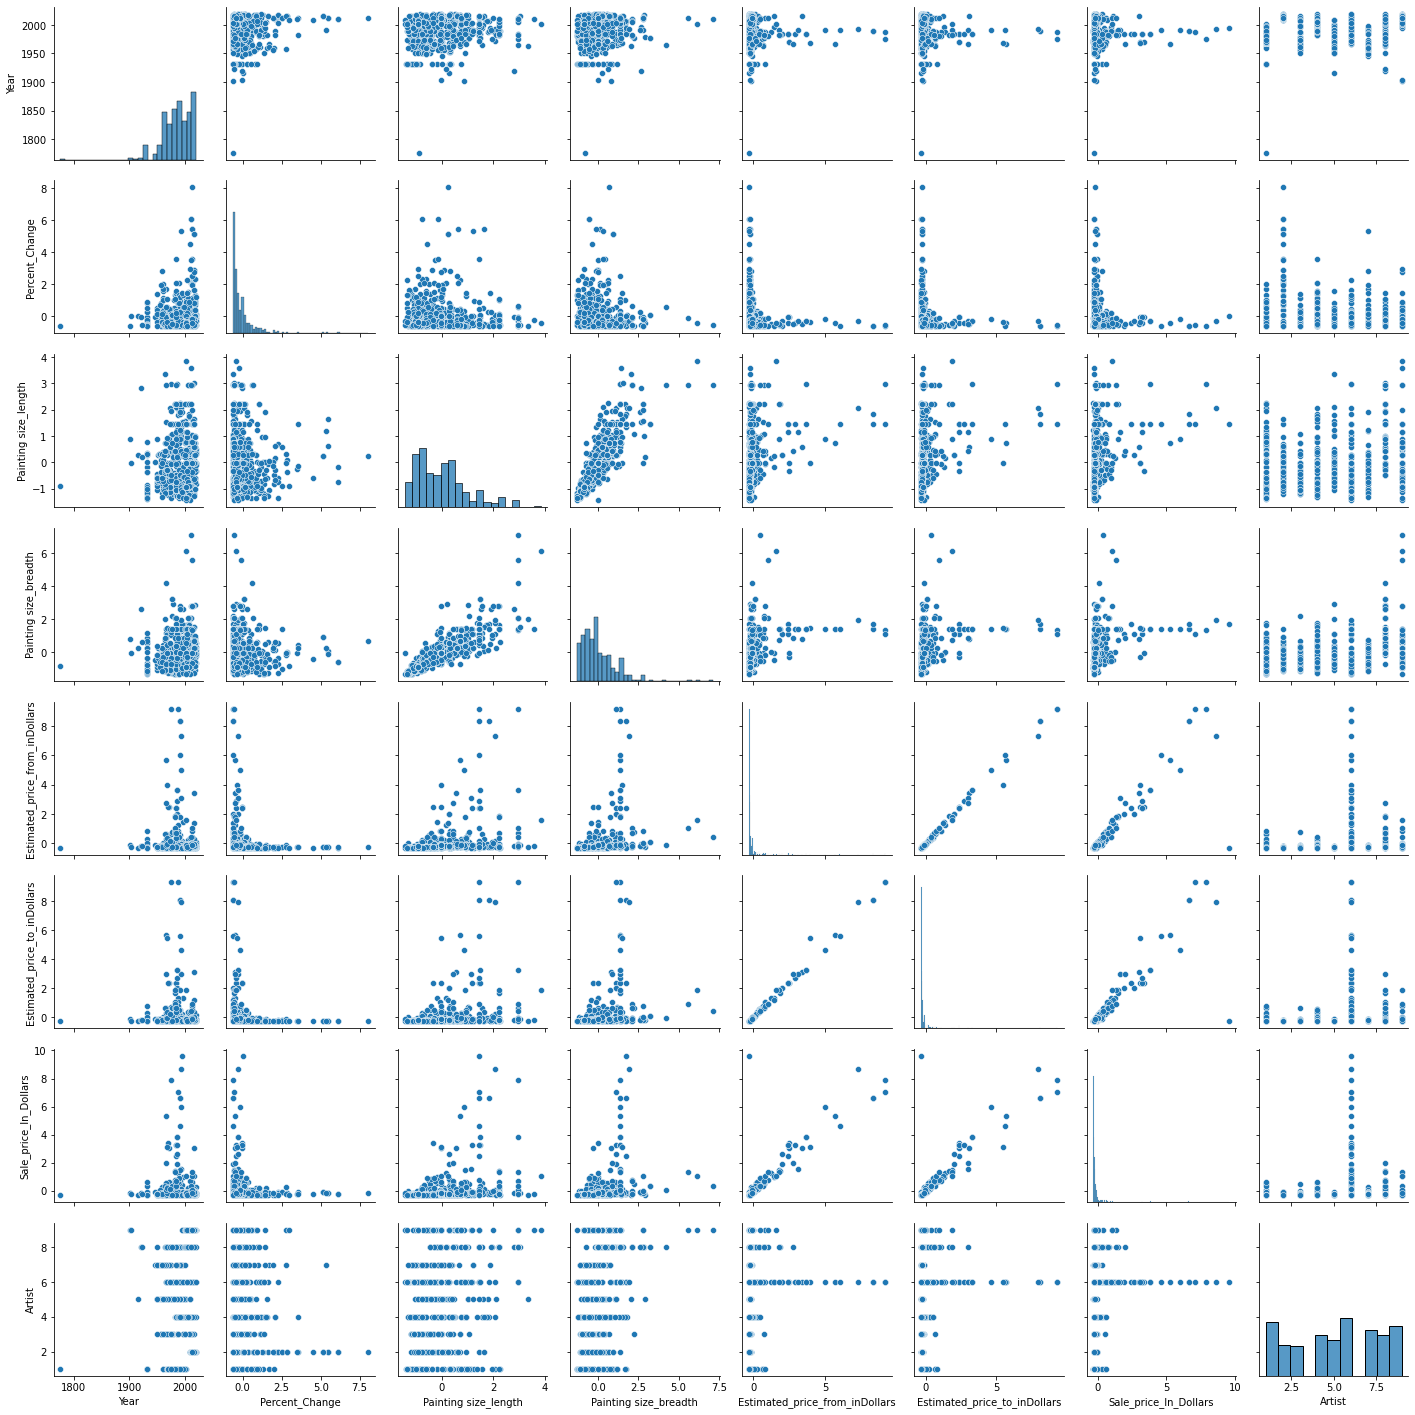

In [60]:
seaborn.pairplot(df1)
# to show
plt.show()

#SPLITTING OF DATA

**SPLITTING INTO INDEPENDENT AND DEPENDENT VARIABLES**

In [61]:
x=df1[["Year","Percent_Change","Painting size_length","Painting size_breadth","Estimated_price_from_inDollars","Estimated_price_to_inDollars","Artist"]]
y=df1[["Sale_price_In_Dollars"]]

**SPLITTING INTO TRAINING AND TESTING**

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [63]:
#shapes of splitted data
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (509, 7)
X_test: (128, 7)
Y_train: (509, 1)
Y_test: (128, 1)


#LINEAR REGRESSION

**TRAINING AND FITTING THE MODEL**

In [64]:
#training the algorithm
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

**INTERCEPT OF MODEL**

In [65]:
#intercept
print(regressor.intercept_)

[0.28303942]


**SLOPE OF MODEL**

In [66]:
#retrieving the slope
print(regressor.coef_)

[[-1.51521882e-04  3.34398014e-02 -9.03869142e-03  1.27851507e-02
   1.69456583e-01  7.81615724e-01  2.03094281e-03]]


In [67]:
#making predictions
y_pred = regressor.predict(x_test)

**EVALUATION OF MODEL USING MAE, MSE AND RMSE**

In [68]:
#calculating rmse
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.16677965695868682
Mean Squared Error: 0.8413172245370839
Root Mean Squared Error: 0.9172334623949804


#POLYNOMIAL REGRESSION

**MODEL TRAINING AND FITTING**

In [69]:
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x_train,y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

In [70]:
poly_pred=pipe.predict(x_test)

**EVALUATION OF MODEL USING MAE, MSE AND RMSE**

In [71]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, poly_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, poly_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, poly_pred)))

Mean Absolute Error: 0.1340139891532441
Mean Squared Error: 0.8279189867656727
Root Mean Squared Error: 0.90990053674326


#RANDOM FOREST REGRESSOR

**MODEL TRAINING AND FITTING**

In [72]:
# Fitting Random Forest Regression to the dataset
# create regressor object
regressor = RandomForestRegressor(n_estimators = 150,max_features = 'sqrt', max_depth = 7, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x_train, y_train)

<ipython-input-72-5e497c5e7942>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y_train)


RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=150,
                      random_state=0)

**EVALUATION OF MODEL USING MAE, MSE AND RMSE**

In [73]:
y_pred = regressor.predict(np.array(x_test))  # test the output by changing values
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1569111564219335
Mean Squared Error: 0.7828871208587339
Root Mean Squared Error: 0.884809087237882


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
